# "Lulusnya Jadi Dua Kali Lebih Lama!"
> "Alasan mengapa diagram batang harus dimulai dari nol"

- toc: false
- branch: master
- badges: true
- comments: true
- author: Ali Akbar
- categories: [statis]

![Diagram batang](http://www.ee.ui.ac.id/web/komputer/wp-content/uploads/sites/2/2018/10/Length-of-Study.png "Sumber: http://www.ee.ui.ac.id/web/komputer/id/fakta-dan-infografis/")

Sebetulnya dari situs yang menyediakan infografik di atas ada beberapa poin yang bisa dibahas, salah satunya adalah penggunaan [*pie chart*](https://grafik.tentangdata.com/statis/2020/06/05/Mari-Berkontribusi-untuk-Masyarakat.html). Namun, supaya tidak bosan, fokus tulisan kali ini adalah ke dua diagram batang di atas.

Di pos-pos sebelumnya{% fn 1 %} lebih banyak dibahas tentang inkonsistensi dari panjang batangnya. Karena grafik di atas kelihatannya dibuat dengan *software* pengolah data, jadi kelihatannya tidak ada kesalahan dari konsistensinya. Masalah yang mau disorot kali ini adalah fakta bahwa diagram batang di atas sumbu y-nya tidak dimulai dari nol.

Mengapa ini jadi penting?

Pada dasarnya, manusia itu menggunakan perbandingan panjang batang tersebut sebagai persepsi proporsi. Ketika tidak dimulai dari nol, selisih panjangnya jadi sangat dipengaruhi oleh titik awalnya. Kalau grafik di atas dilihat sekilas, kesannya dari 2013/2014 term 1 ke 2013/2014 term 2 rata-rata waktu studinya naik lebih dari dua kali lipat!

Sebagai perbandingan, mari perhatikan grafik di bawah yang dimulai dari nol.

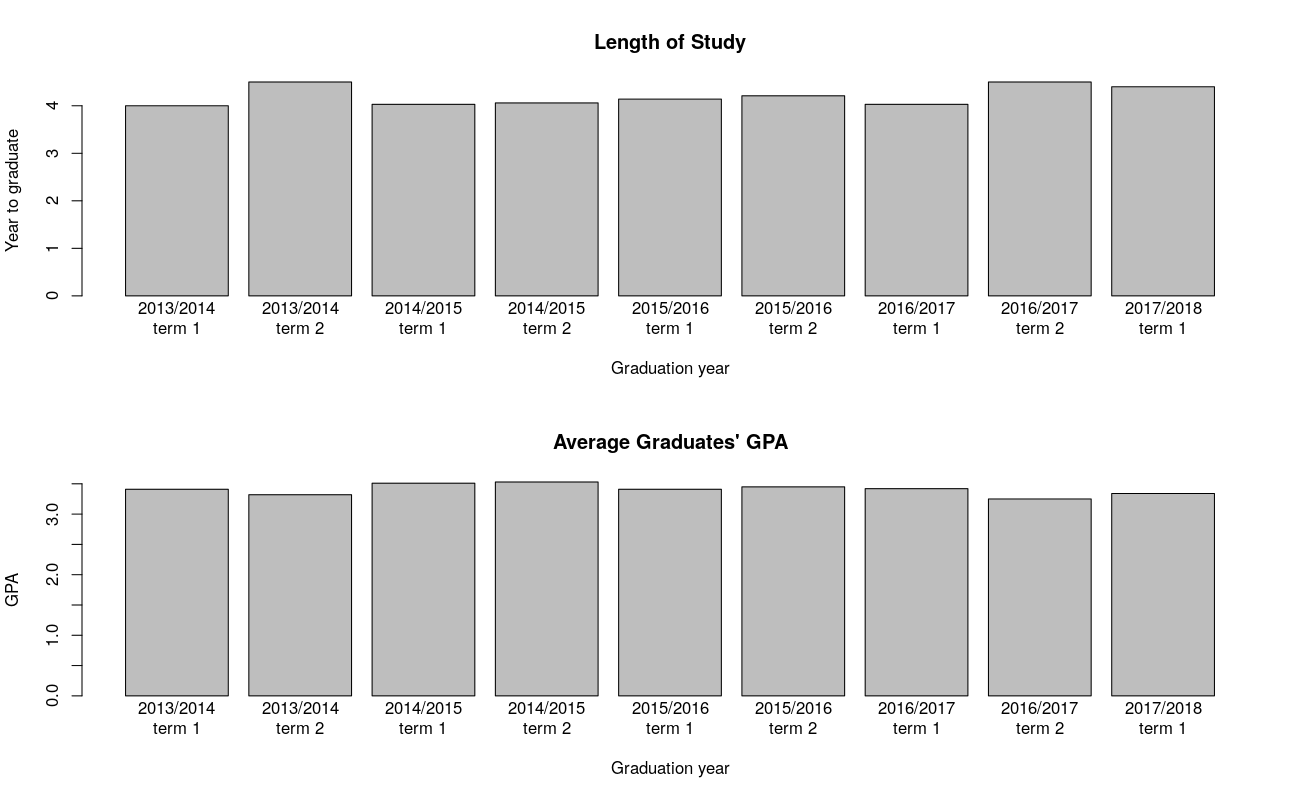

In [14]:
#collapse-hide

suppressPackageStartupMessages(library(tidyverse))

theme_set(theme_minimal(base_size = 20))

# Abaikan kompleksitas kode dalam membuat term-nya, saya sedang latihan R
df <- tibble(
    term = head(
        sort(c(outer(
            paste(2013:2017, 2014:2018, sep = "/"),
            c('term 1', 'term 2'),
            FUN = paste,
            sep = "\n"
        ))),
        -1
    ),
    mean_year = c(4, 4.5, 4.03, 4.06, 4.14, 4.21, 4.03, 4.5, 4.4),
    gpa = c(3.41, 3.32, 3.51, 3.53, 3.41, 3.45, 3.42, 3.25, 3.34)
)

par(mfrow = c(2, 1))
with(df, {
    barplot(
        mean_year ~ term,
        main = 'Length of Study',
        xlab = 'Graduation year',
        ylab = 'Year to graduate'
    )
    barplot(
        gpa ~ term,
        main = "Average Graduates' GPA",
        xlab = "Graduation year",
        ylab = "GPA"
    )
})

*Malah jadi kurang menarik ya?*

Karena memang mahasiswa S1 di Indonesia biasanya lulusnya tidak jauh-jauh dari empat tahun, perbedaannya tidak terlihat begitu signifikan. Grafik di atas sudah benar, tapi jadi kurang *bercerita*. Salah satu solusi untuk data yang ada hubungannya dengan waktu seperti ini adalah dengan menggunakan diagram garis atau *line plot*.

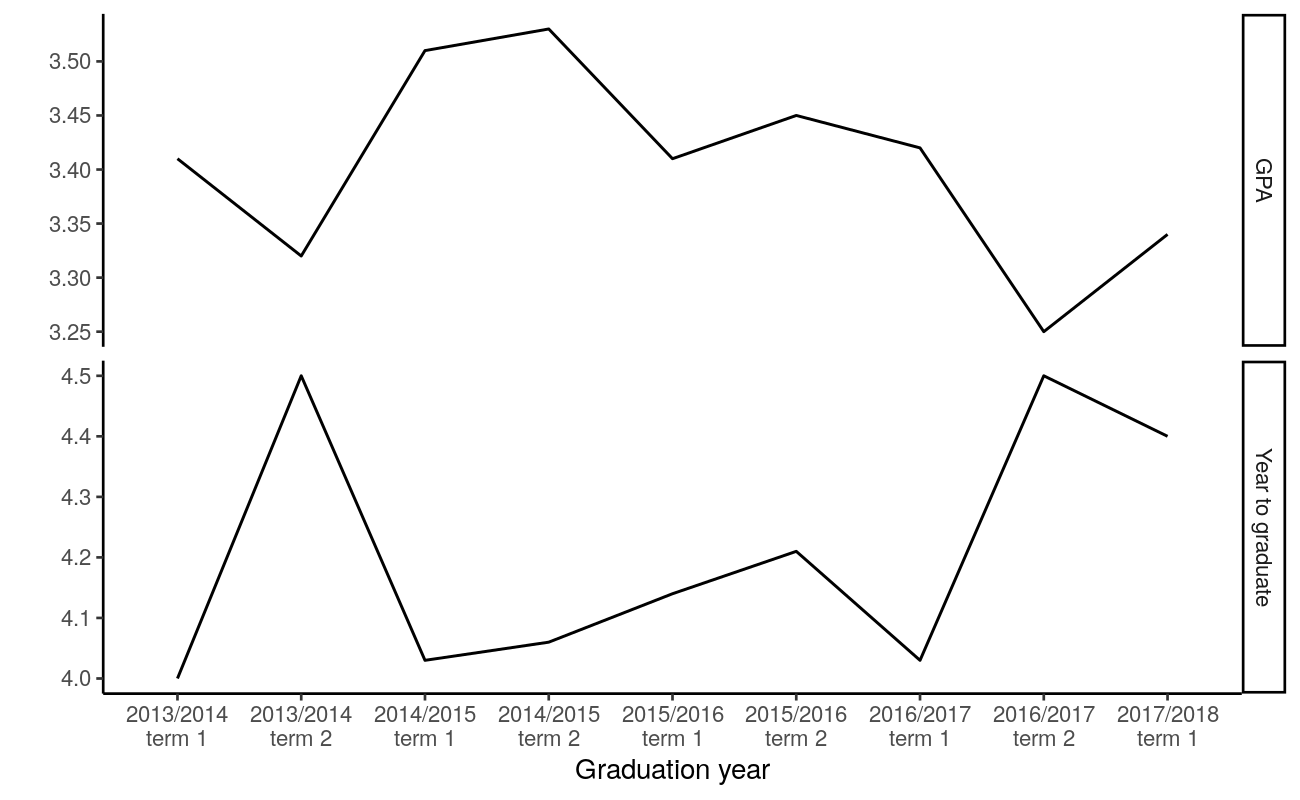

In [16]:
#collapse-hide

options(repr.plot.width = 13, repr.plot.height = 8, repr.plot.res = 100)

df %>%
    rename(
        GPA = gpa,
        `Year to graduate` = mean_year
    ) %>%
    pivot_longer(-(term)) %>%
    ggplot(aes(group = 1)) +
    geom_line(aes(x = term, y = value), size = 1) +
    labs(x = "Graduation year", y = "") +
    facet_grid(name ~ ., scales = 'free_y') +
    theme_classic(base_size = 20)

Dengan begini, fluktuasinya jadi lebih terlihat dan orang tidak akan berekspektasi bahwa waktu lulusnya bertambah sampai dua kali lipat. Berdasarkan ilmu dari [sini](https://flowingdata.com/2015/08/31/bar-chart-baselines-start-at-zero/),
> Memulai diagram batang dari nol itu adalah aturan, bukan saran.

Jadi, daripada mengubah titik awal dari diagram batangnya, lebih baik diubah sekalian jenis diagramnya.

Ngomong-ngomong, apakah Anda melihat pola yang lain dari grafik di atas?

{{ '[Ini](https://grafik.tentangdata.com/statis/2020/05/30/Muslihat-Visualisasi-dan-Politik.html), [ini](https://grafik.tentangdata.com/dinamis/2020/06/03/Lokadata-Rerata-ART.html), dan [ini](https://grafik.tentangdata.com/statis/2020/06/03/Pertumbuhan-Kargo-Domestik-dan-Internasional.html).' | fndetail: 1 }}